In [2]:
A = [(14947.9,0.786),(23031,0.799),(30918,0.857),(37152.8,0.889),(37004.2,0.8921)]

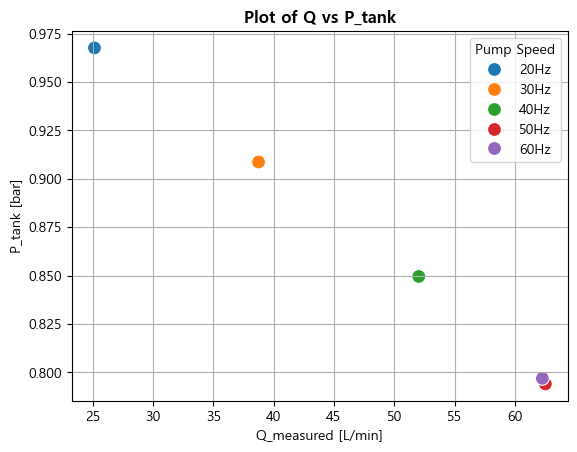

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic') # Windows의 경우

# 이전 대화에서 계산된 (Re, K_o) 데이터 A
A = [
    (25.15,0.9676),
    (38.75,0.9087),
    (52.02,0.8496),
    (62.51,0.7941),
    (62.26,0.797)
]

# 범례에 사용할 라벨
labels = ['20Hz', '30Hz', '40Hz', '50Hz', '60Hz']

# 1. 데이터를 Pandas DataFrame으로 변환합니다.
df = pd.DataFrame({
    'Q_measured': [point[0] for point in A],
    'P': [point[1] for point in A],
    'Frequency': labels
})

# 2. scatterplot을 생성할 때 'hue' 파라미터에 범례로 사용할 열을 지정합니다.
sns.scatterplot(data=df, x='Q_measured', y='P', hue='Frequency', s=100) # s=100은 점 크기 조절

# 제목 및 축 라벨 설정
plt.title('Plot of Q vs P_tank', weight='bold')
plt.xlabel('Q_measured [L/min]')
plt.ylabel('P_tank [bar]')

# 범례 위치를 자동으로 최적의 장소에 배치
plt.legend(title='Pump Speed') 
plt.grid(True) # 그리드 추가
plt.show()

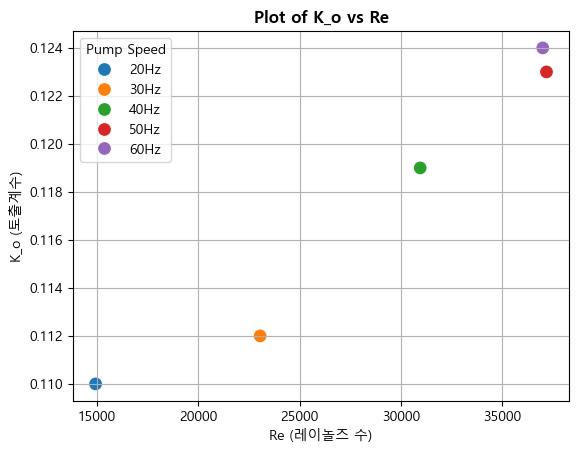

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

#(Re, K_o) 데이터
A = [(14945, 0.110),
    (23059, 0.112),
    (30950, 0.119),
    (37178, 0.123),
    (36994, 0.124)]

#Legend Label
labels = ['20Hz', '30Hz', '40Hz', '50Hz', '60Hz']

#Data Frame
df = pd.DataFrame({
    'Re': [point[0] for point in A],
    'K_o': [point[1] for point in A],
    'Frequency': labels
})

# Scatterplot
sns.scatterplot(data=df, x='Re', y='K_o', hue='Frequency', s=100) # s=100은 점 크기 조절

#Title, axis labeling
plt.title('Plot of K_o vs Re', weight='bold')
plt.xlabel('Re (레이놀즈 수)')
plt.ylabel('K_o (토출계수)')

# Legend
plt.legend(title='Pump Speed') 
plt.grid(True) # 그리드 추가
plt.show()

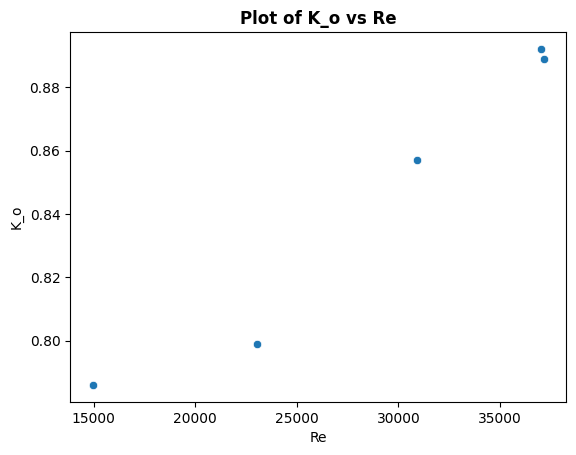

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Split the tuples into x and y values
x_values = [point[0] for point in A]
y_values = [point[1] for point in A]

# Create the plot
sns.scatterplot(x=x_values, y=y_values)
plt.title('Plot of K_o vs Re',weight='bold')
plt.xlabel('Re')
plt.ylabel('K_o')
plt.show()

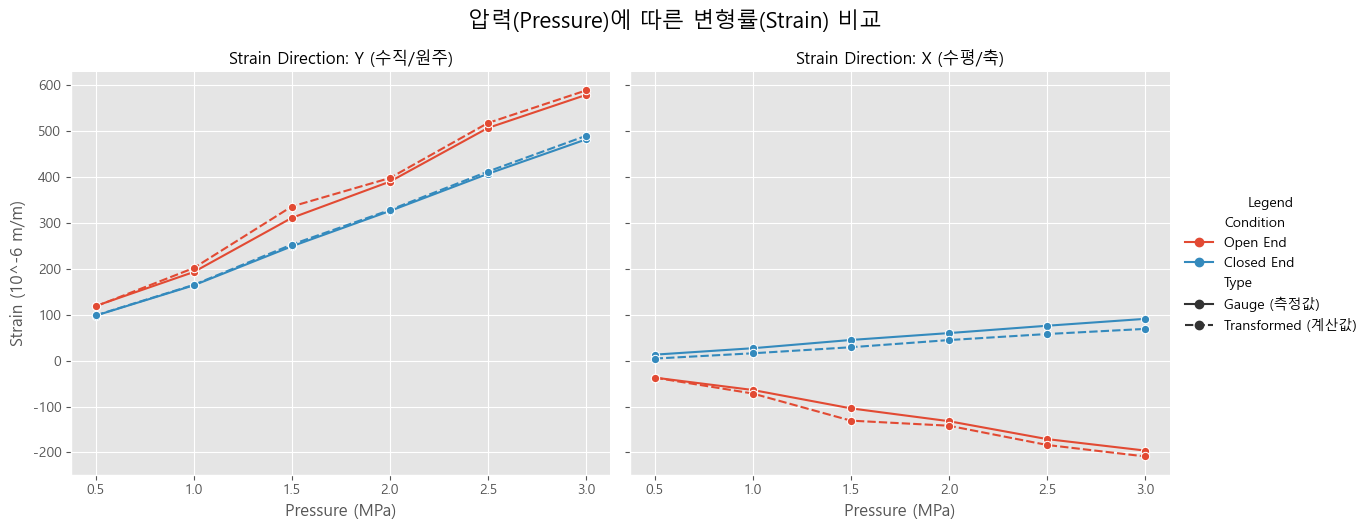

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. 데이터 준비 (두 개의 표 데이터를 Tidy Data 형태로 통합)
# ---------------------------------------------------------------
plt.style.use('ggplot')
data = {
    'Pressure': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] * 8, # 6개 압력 포인트 * 8개 데이터 시리즈
    'Strain': [
        # --- Open End ---
        # Y-Direction
        119, 193, 311, 390, 507, 579,         # Open - Gauge 1 (Y)
        118.1, 201.66, 335.81, 397.86, 517.78, 588.78, # Open - Transformed (Y)
        # X-Direction
        -37, -64, -104, -132, -171, -196,     # Open - Gauge 2 (X)
        -37.1, -71.66, -130.81, -141.86, -183.78, -208.78, # Open - Transformed (X)
        
        # --- Closed End ---
        # Y-Direction
        98, 164, 249, 326, 407, 482,         # Closed - Gauge 1 (Y)
        98.56, 165.03, 252.86, 328.22, 412.05, 489.88, # Closed - Transformed (Y)
        # X-Direction
        13, 27, 45, 60, 76, 91,               # Closed - Gauge 2 (X)
        4.44, 15.97, 29.14, 44.78, 57.95, 69.12    # Closed - Transformed (X)
    ],
    # ---------------------------------------------------------------
    # 2. 비교를 위한 카테고리 설정
    # ---------------------------------------------------------------
    # 'Condition' (hue로 사용될 항목)
    'Condition': (['Open End'] * 24) + (['Closed End'] * 24),
    
    # 'Direction' (그래프를 2개로 나누는 기준)
    'Direction': (['Y (수직/원주)'] * 12 + ['X (수평/축)'] * 12) * 2,
    
    # 'Type' (선 스타일로 사용될 항목)
    'Type': (['Gauge (측정값)'] * 6 + ['Transformed (계산값)'] * 6) * 4
}

# Pandas DataFrame으로 변환
df = pd.DataFrame(data)

# ---------------------------------------------------------------
# 3. 그래프 그리기
# ---------------------------------------------------------------
# ❗️ 한글 폰트 설정 (그래프에 한글이 깨질 경우)
#plt.rcParams['font.family'] = 'AppleGothic' # (Mac OS 예시)
plt.rcParams['font.family'] = 'Malgun Gothic' # (Windows 예시)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# Seaborn의 relplot을 사용하여 다중 그래프 생성
g = sns.relplot(
    data=df,
    x='Pressure',
    y='Strain',
    col='Direction',     # 'Direction' (X, Y)에 따라 그래프를 2개로 나눔
    hue='Condition',     # 'Condition' (Open/Closed)을 **색상**으로 구분 (요청하신 'hue')
    style='Type',        # 'Type' (Gauge/Transformed)을 **선 스타일**(실선/점선)로 구분
    kind='line',         # 라인 그래프
    marker='o',          # 데이터 포인트에 마커 표시
    height=5,            # 그래프 높이
    aspect=1.2          # 그래프 가로/세로 비율
)

# ---------------------------------------------------------------
# 4. 그래프 꾸미기
# ---------------------------------------------------------------
g.fig.suptitle('압력(Pressure)에 따른 변형률(Strain) 비교', y=1.05, fontsize=16)
g.set_axis_labels('Pressure (MPa)', 'Strain (10^-6 m/m)')
g.set_titles("Strain Direction: {col_name}", fontsize=12) # 각 그래프의 소제목
g.legend.set_title("Legend")

# 그래프 보이기
plt.show()

c:\miniconda\envs\vscode_ju\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\miniconda\envs\vscode_ju\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


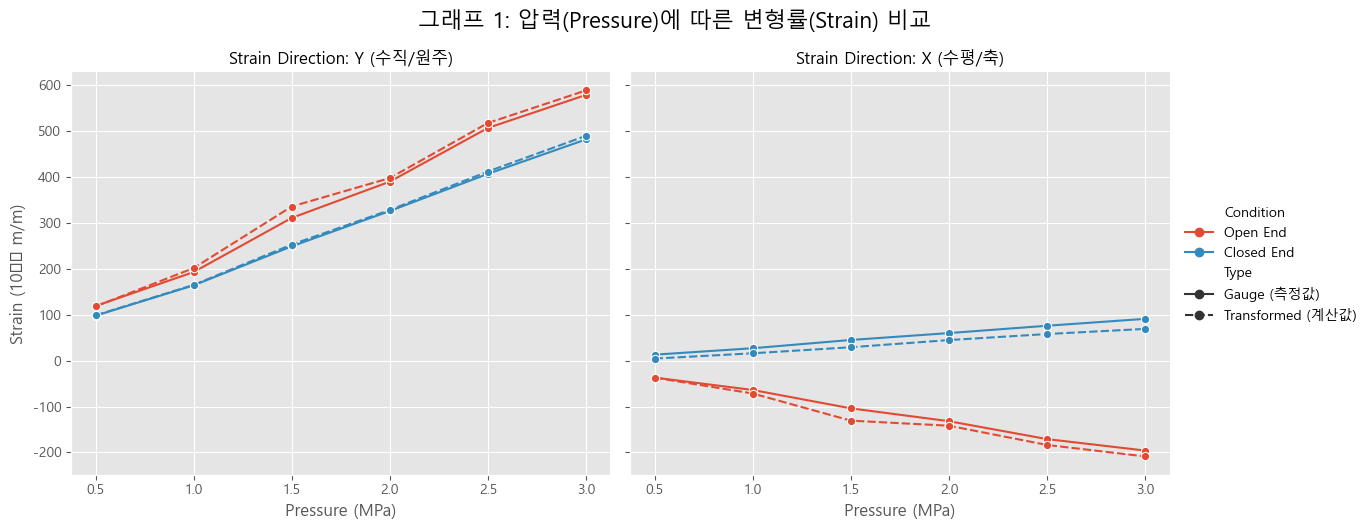

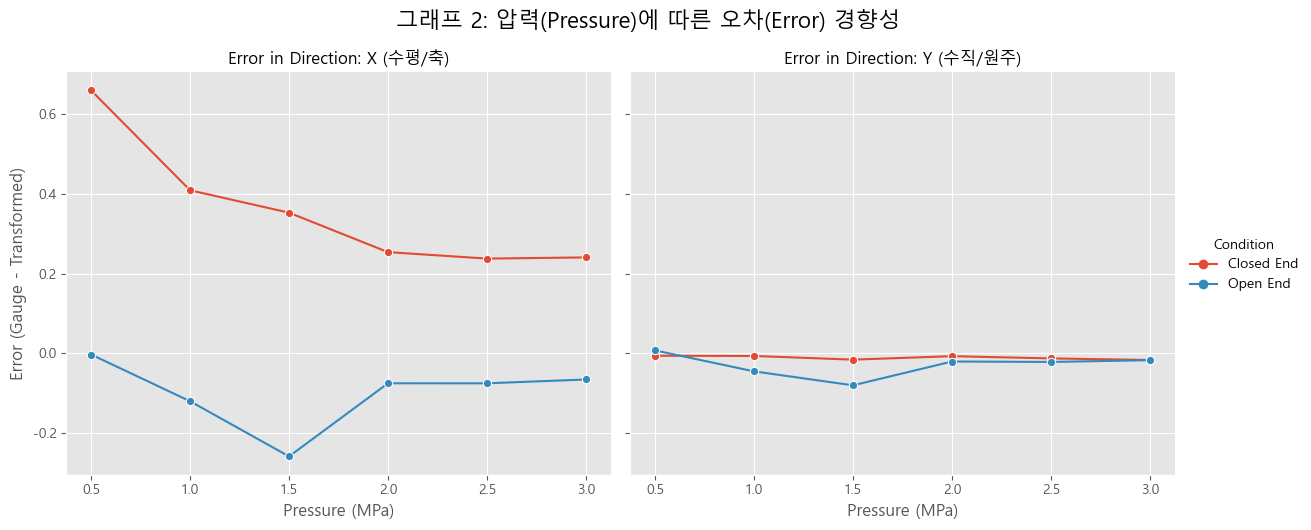

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. 데이터 준비 (이전과 동일)
# ---------------------------------------------------------------
data = {
    'Pressure': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] * 8, 
    'Strain': [
        # --- Open End ---
        119, 193, 311, 390, 507, 579,         # Open - Gauge 1 (Y)
        118.1, 201.66, 335.81, 397.86, 517.78, 588.78, # Open - Transformed (Y)
        -37, -64, -104, -132, -171, -196,     # Open - Gauge 2 (X)
        -37.1, -71.66, -130.81, -141.86, -183.78, -208.78, # Open - Transformed (X)
        # --- Closed End ---
        98, 164, 249, 326, 407, 482,         # Closed - Gauge 1 (Y)
        98.56, 165.03, 252.86, 328.22, 412.05, 489.88, # Closed - Transformed (Y)
        13, 27, 45, 60, 76, 91,               # Closed - Gauge 2 (X)
        4.44, 15.97, 29.14, 44.78, 57.95, 69.12    # Closed - Transformed (X)
    ],
    'Condition': (['Open End'] * 24) + (['Closed End'] * 24),
    'Direction': (['Y (수직/원주)'] * 12 + ['X (수평/축)'] * 12) * 2,
    'Type': (['Gauge (측정값)'] * 6 + ['Transformed (계산값)'] * 6) * 4
}

df = pd.DataFrame(data)

# ❗️ 한글 폰트 설정 (필요시 주석 해제)
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호

# ---------------------------------------------------------------
# 3. 그래프 1: 변형률(Strain) 비교 (이전과 동일)
# ---------------------------------------------------------------
g_strain = sns.relplot(
    data=df,
    x='Pressure',
    y='Strain',
    col='Direction',
    hue='Condition',
    style='Type',
    kind='line',
    marker='o',
    height=5,
    aspect=1.2
)
g_strain.fig.suptitle('그래프 1: 압력(Pressure)에 따른 변형률(Strain) 비교', y=1.05, fontsize=16)
g_strain.set_axis_labels('Pressure (MPa)', 'Strain (10⁻⁶ m/m)')
g_strain.set_titles("Strain Direction: {col_name}", fontsize=12)

# ---------------------------------------------------------------
# 4. (추가) 오차(Error) 계산
# ---------------------------------------------------------------
# 'Type'을 기준으로 DataFrame을 피벗(pivot)하여 'Gauge'와 'Transformed'를 열로 만듦
df_pivot = df.pivot_table(
    index=['Pressure', 'Condition', 'Direction'],
    columns='Type',
    values='Strain'
).reset_index()

# 'Gauge' - 'Transformed'로 오차 계산
df_pivot['Error (Gauge - Transformed)'] = (df_pivot['Gauge (측정값)'] - df_pivot['Transformed (계산값)']) / df_pivot['Gauge (측정값)']


# ---------------------------------------------------------------
# 5. (추가) 그래프 2: 오차(Error) 플로팅
# ---------------------------------------------------------------
g_error = sns.relplot(
    data=df_pivot,
    x='Pressure',
    y='Error (Gauge - Transformed)',
    col='Direction',     # X방향 오차, Y방향 오차를 나눠서 그림
    hue='Condition',     # Open/Closed를 색상으로 구분
    kind='line',
    marker='o',
    height=5,
    aspect=1.2
)
g_error.fig.suptitle('그래프 2: 압력(Pressure)에 따른 오차(Error) 경향성', y=1.05, fontsize=16)
g_error.set_axis_labels('Pressure (MPa)', 'Error (Gauge - Transformed)')
g_error.set_titles("Error in Direction: {col_name}", fontsize=12)

# 두 개의 그래프를 모두 표시
plt.show()